On imagine que les gens sont dotés de pouvoir surpuissants et ils peuvent savoir si le prix dans 15 jours sera plus ou moins élevé que le prix actuel. Si c'est le cas, alors les tweets sont tirés au hasard suivant une loi optimiste. Si ce n'est pas le cas, alors les tweets sont tirés suivant une loi pessimiste.

In [46]:
import yfinance as yf
import pandas as pd
from helpers import dropnas

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


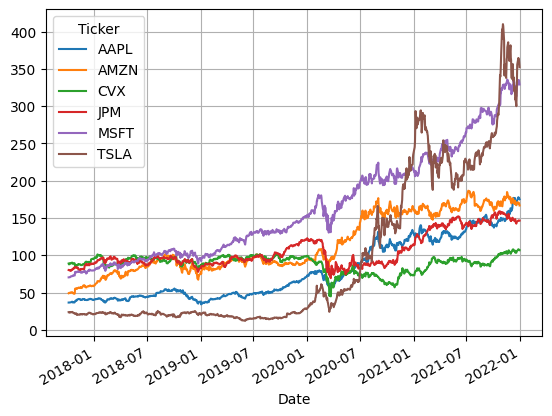

In [48]:
tickers = ['AAPL', 'AMZN', 'TSLA', 'MSFT', 'CVX', 'JPM']

start_date = '2017-10-05'
end_date = '2022-01-01'

stock_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker  # Add a column with the ticker symbol
    stock_data = pd.concat([stock_data, data])

prices = stock_data[['Ticker', 'Adj Close']].pivot_table(values='Adj Close', index=stock_data.index, columns='Ticker')
prices.plot(grid=True)
prices.to_parquet('prices.pq')

In [97]:
ret = prices / prices.shift() - 1
h_corr = ret.rolling(window=250, min_periods=20).corr()
f_corr = ret.rolling(window=20, min_periods=20).corr()
f_corr = f_corr.shift(-20*ret.shape[1])
h_corr = dropnas(h_corr)
f_corr = dropnas(f_corr)
EFF_START_DATE = h_corr.index.get_level_values(0).unique()[0]
EFF_END_DATE = f_corr.index.get_level_values(0).unique()[-1]
f_corr = f_corr.loc[pd.IndexSlice[EFF_START_DATE:EFF_END_DATE, :], :]
h_corr = h_corr.loc[pd.IndexSlice[EFF_START_DATE:EFF_END_DATE, :], :]
h_corr.to_parquet('h_corr.pq')
f_corr.to_parquet('f_corr.pq')

full_dates = pd.date_range(start=EFF_START_DATE, end=EFF_END_DATE)
will_increase = (prices.shift(-15) >= prices).loc[EFF_START_DATE:EFF_END_DATE].reindex(full_dates, method='ffill')
will_increase.to_parquet('will_increase.pq')


In [98]:
will_increase.mean()

Ticker
AAPL    0.685657
AMZN    0.638070
CVX     0.552949
JPM     0.579759
MSFT    0.712466
TSLA    0.581769
dtype: float64

In [94]:
EFF_START_DATE

Timestamp('2017-11-02 00:00:00')

In [95]:
EFF_END_DATE

Timestamp('2021-12-02 00:00:00')